In [15]:
import os
import pickle
import numpy as np
import xgboost
from calculate_confusion_matrix import calculate_confusion_matrix
from sklearn import preprocessing
from split_balanced import split_balanced

n_min = 3 # minimum number of samples for each class to be kept

ft_dir = 'features/'

files = os.listdir(ft_dir)
#files= [files[40]]

confs = []
aucs = []
labels = []

for filename in files:
    with open(ft_dir+filename) as f:  
        
        print filename
        # skipping this subject as it doesn't have enough data
        if filename in ['features_1401811.dat','features_1230637.dat','features_1299151.dat','features_1294671.dat']:
            print 'subject skipped because of lack of data'
            continue
        
        feature, state = pickle.load(f)

        # removing extra characters from states
        for (i,s) in enumerate(state):
            state[i] = s.replace('"','')
        
        # removing instances with low class frequency
        le = preprocessing.LabelEncoder()
        le.fit(state)
        state_code = le.transform(state) 
        feature_new = np.array([])
        state_new = np.array([])
        for (i,s) in enumerate(state_code):
            inds = np.where(state_code==s)[0]
            if inds.size>=n_min:
                if feature_new.size==0:
                    feature_new = np.array([feature[i,:]])
                else:
                    feature_new = np.append(feature_new, [feature[i,:]], axis=0)
                state_new = np.append(state_new, state[i])
        state = state_new
        feature = feature_new
        
        #creating train and test sets
        x_train, y_train, x_test, y_test = split_balanced(feature, state, 0.5)

        #train
        gbm = xgboost.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(x_train, y_train)

        #test
        predictions = gbm.predict(x_test)

        conf, roc_auc = calculate_confusion_matrix(predictions, y_test)
        print np.unique(state)
        print roc_auc
        print '------------------'
    
        labels.append(np.unique(np.append(y_test, predictions)))
        confs.append(conf)
        aucs.append(roc_auc)

# saving the results
with open('accuracy_personal.dat','w') as f:
    pickle.dump([aucs, confs, labels], f)
f.close()


features_1355344.dat
["Another's Home" 'Home' 'Professional or Medical Office'
 'Salon (Hair, Nails, Tan, etc.), School' 'School' 'Shop or Store'
 'Vehicle']
[ 0.71666667  0.95652174  0.78837209         nan  0.53014184  0.88475177
         nan]
------------------
features_JK130XR.dat
['Arts & Entertainment (Theater, Music Venue, Etc.)'
 'Food (Restaurant, Cafe)' 'Gym or Other Exercise' 'Home' 'Hotel'
 'Movie Theater' 'Nightlife Spot (Bar, Club)'
 'Nightlife Spot (Bar, Club), Food (Restaurant, Cafe)'
 'Outdoors & Recreation' 'Shop or Store' 'Spiritual (Church, Temple, Etc.)'
 'Travel or Transport (Airport, Bus Stop, Train Station, Etc.)' 'Vehicle'
 'Work']
[ 0.54131356  0.72177419  0.87933884  0.86941998  0.65853659         nan
  0.99193548         nan  0.66666667  0.76534653  0.47560976  0.996
  0.4796748   0.82908163]
------------------
features_1553904.dat
['Arts & Entertainment (Theater, Music Venue, Etc.)'
 'Food (Restaurant, Cafe)' 'Home' 'Outdoors & Recreation' 'School '
 'Shop o

(-1, 11)

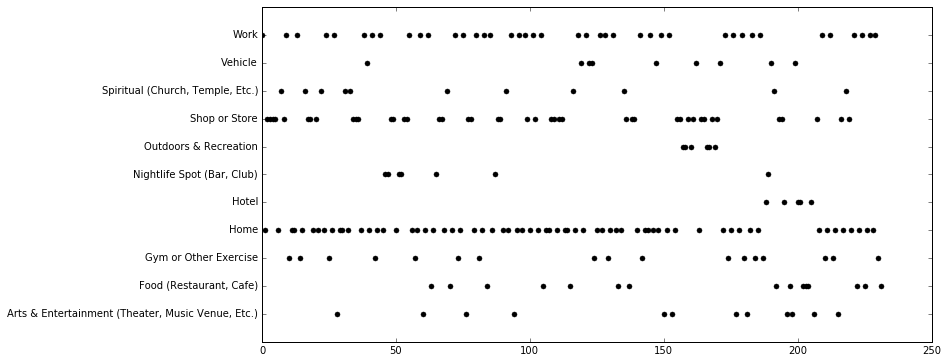

In [35]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pickle
import numpy as np

%matplotlib inline

le = preprocessing.LabelEncoder()
le.fit(state)
state_code = le.transform(state)
state_uniq = np.unique(state)

plt.figure(figsize=(12,6))
plt.plot(state_code,'.k',markersize=10)
plt.yticks(range(len(state_uniq)), state_uniq)
axes = plt.gca()
axes.set_ylim([-1, len(state_uniq)])

In [17]:
print x_train.shape

(71, 25)
